Here we list the Python code for several statistical models created. One can find both linear models and more advanced ML methods for identifying a model which predicts the readability of Latin texts best based on the estimated linguistic predictors.

We start with the **linear model** for which you will here find the code for (1) forward selection, (2) the initial step where you choose the two best predictors for the model, and (3) the final model result incl. the results of 3/5/10-fold cross-validation.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Load data
df = pd.read_excel("ling_var.xlsx", sheet_name=0)

# Number of cross-validation folds
num_folds = 10

# Manually specify random seed for reproducibility
random_state = 123

# Create a cross-validation control object
cv_control = KFold(n_splits=num_folds, shuffle=True, random_state=random_state)

# Initialize variables to store results
best_rmse = float('inf')
best_predictor = None

# Specify the predictor variables
predictor_names = [col for col in df.columns if col not in ["rr_75", "2pl", "whsw_ran", "synsw", "Schw."]]

# Loop through all predictor variables
for predictor_name in predictor_names:
    X = df[["rr_75", "2pl", "whsw_ran", "synsw", predictor_name]]
    y = df["Schw."]
    rmse_scores = []
    p_values = []  # Store p-values for each fold
    for train_index, test_index in cv_control.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Fit linear regression model
        X_train = sm.add_constant(X_train)  # Add constant for intercept
        model = sm.OLS(y_train, X_train)
        results = model.fit()
        
        # Store p-values for each predictor
        p_values.append(results.pvalues)
        
        # Evaluate on test set
        X_test = sm.add_constant(X_test)  # Add constant for intercept
        y_pred = results.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)
        
    avg_rmse = np.mean(rmse_scores)
    
    # Check if all p-values are below 0.05
    if all(p_value < 0.05 for p_value in np.mean(p_values, axis=0)):
        if avg_rmse < best_rmse:
            best_rmse = avg_rmse
            best_predictor = predictor_name

print("Best Predictor:", best_predictor)
print("Best RMSE:", best_rmse)

# Fit final model with best predictor
X = df[["rr_75", "2pl", "whsw_ran", "synsw", best_predictor]]
X = sm.add_constant(X)  # Add constant for intercept
y = df["Schw."]
model = sm.OLS(y, X)
results = model.fit()

# Print statistical summary
print(results.summary())

Best Predictor: SE_optimum
Best RMSE: 1.260519349293992
                            OLS Regression Results                            
Dep. Variable:                  Schw.   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     15.58
Date:                Sun, 07 Jul 2024   Prob (F-statistic):           7.38e-10
Time:                        11:28:56   Log-Likelihood:                -107.28
No. Observations:                  67   AIC:                             226.6
Df Residuals:                      61   BIC:                             239.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Load data
df = pd.read_excel("ling_var.xlsx", sheet_name=0)

# Number of cross-validation folds
num_folds = 10

# Manually specify random seed for reproducibility
random_state = 123

# Create a cross-validation control object
cv_control = KFold(n_splits=num_folds, shuffle=True, random_state=random_state)

# Initialize variables to store results
best_rmse = float('inf')
best_predictors = None

# Specify the predictor variables
predictor_names = [col for col in df.columns if col != "Schw."]

# Loop through all unique pairs of predictor variables
for i in range(len(predictor_names)):
    for j in range(i + 1, len(predictor_names)):
        predictor_name_1 = predictor_names[i]
        predictor_name_2 = predictor_names[j]
        
        X = df[[predictor_name_1, predictor_name_2]]
        y = df["Schw."]
        rmse_scores = []
        for train_index, test_index in cv_control.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Fit linear regression model
            X_train = sm.add_constant(X_train)  # Add constant for intercept
            model = sm.OLS(y_train, X_train)
            results = model.fit()

            # Evaluate on test set
            X_test = sm.add_constant(X_test)  # Add constant for intercept
            y_pred = results.predict(X_test)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            rmse_scores.append(rmse)

        avg_rmse = np.mean(rmse_scores)
        if avg_rmse < best_rmse:
            best_rmse = avg_rmse
            best_predictors = (predictor_name_1, predictor_name_2)

print("Best Predictors:", best_predictors)
print("Best RMSE:", best_rmse)

# Fit final model with best predictors
X = df[list(best_predictors)]
X = sm.add_constant(X)  # Add constant for intercept
y = df["Schw."]
model = sm.OLS(y, X)
results = model.fit()

# Print statistical summary
print(results.summary())

Best Predictors: ('rr_75', '2pl')
Best RMSE: 1.4393134697192536
                            OLS Regression Results                            
Dep. Variable:                  Schw.   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     21.14
Date:                Sun, 07 Jul 2024   Prob (F-statistic):           8.92e-08
Time:                        11:57:13   Log-Likelihood:                -117.85
No. Observations:                  67   AIC:                             241.7
Df Residuals:                      64   BIC:                             248.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [2]:
# Fit final model with best predictor
X = df[["rr_75", "2pl", "whsw_ran", "pqp", "SE_optimum", "stt", "synsw", "3sg", "ttrsw"]]
X = sm.add_constant(X)  # Add constant for intercept
y = df["Schw."]
model = sm.OLS(y, X)
results = model.fit()

# Print statistical summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Schw.   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     14.10
Date:                Sun, 07 Jul 2024   Prob (F-statistic):           1.26e-11
Time:                        11:30:39   Log-Likelihood:                -95.603
No. Observations:                  67   AIC:                             211.2
Df Residuals:                      57   BIC:                             233.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4778      3.034      4.772      0.0

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Load data
df = pd.read_excel("ling_var.xlsx", sheet_name=0)

# Specify predictor variables and target variable
X = df[["rr_75", "2pl", "whsw_ran", "pqp", "SE_optimum", "stt", "synsw", "3sg", "ttrsw"]]
y = df["Schw."]

# Define different number of cross-validation folds
num_folds_list = [3, 5, 10]

# Manually specify random seed for reproducibility
random_state = 123

for num_folds in num_folds_list:
    # Create a cross-validation control object
    cv_control = KFold(n_splits=num_folds, shuffle=True, random_state=random_state)

    # Initialize variables to store results
    rmse_scores = []
    r2_scores = []

    for train_index, test_index in cv_control.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit linear regression model
        X_train = sm.add_constant(X_train)  # Add constant for intercept
        model = sm.OLS(y_train, X_train)
        results = model.fit()

        # Evaluate on test set
        X_test = sm.add_constant(X_test)  # Add constant for intercept
        y_pred = results.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

        # Calculate R-squared
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

    avg_rmse = np.mean(rmse_scores)
    avg_r2 = np.mean(r2_scores)

    print(f"Number of Folds: {num_folds}")
    print("RMSE:", avg_rmse)
    print("R-squared:", avg_r2)
    print()

Number of Folds: 3
RMSE: 1.1480552330941174
R-squared: 0.5359098791433828

Number of Folds: 5
RMSE: 1.1259876311683499
R-squared: 0.5001881145526378

Number of Folds: 10
RMSE: 1.0924426628351716
R-squared: 0.37606582599594524



An alterantive to the 'normal' multiple linear regression is **lasso regression**.

0.07964455382521346
Non-zero coefficients:
wh_freq: -0.045998665073164934
whsw_freq: 0.05114684237781929
rr_80: 0.2501467080226133
lnsyn: 0.19538165910058952
synsw: -0.01464172471467546
syn500: -0.3561350758847517
1sg: -0.3171158582235564
2pl: 0.12041120095326209
pqp: -0.1383760216492682
fut2: -0.24599697353802175
ana: 0.037529994298150966
kon: -0.05420330563371311
pr12_w: -0.17497015518051423
prps_w: -0.42790592566519553
kr_3: 0.4193055586039998
sim_wn: 0.14674219374522848
ovw: 0.09713329296022849
vH_w: 0.7083678032805024
vH_H: 0.19884914720922828
R+I: 0.05714005924627307
R. SA: -0.22146632308109532
ind. FS: 0.08759200220482719
quin-S.: -0.091195413932781
cum + I: 0.4714291605207295
Temp. S.: -0.06255479522542574
Abl. Abs.: 0.033504562100014096
Dat. auct.: -0.08402891999917826
Kasus: -0.11873480031381715
R squared training set 92.19
R squared test set -100.69
RMSE test set 1.96


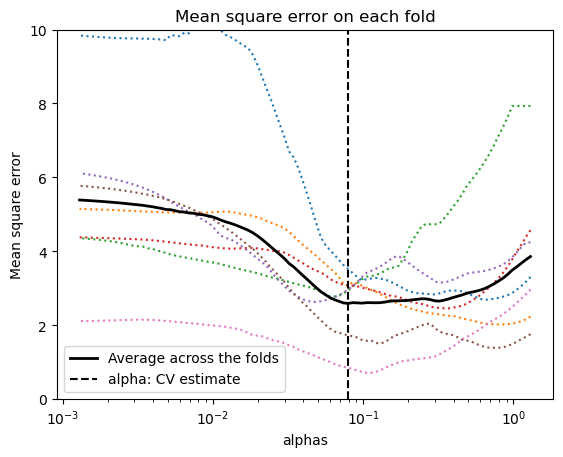

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load data
df = pd.read_excel("ling_var.xlsx", sheet_name=0)

# Create dependent and independent variables
y = df["Schw."]
X = df.drop(["Schw."], axis=1)

# Split the data set into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Standardize train and test set
list_numerical = X.columns
scaler = StandardScaler().fit(X_train[list_numerical]) 
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

# Lasso with 7 fold cross-validation
model = LassoCV(cv=7, random_state=0, max_iter=10000)
model.fit(X_train, y_train)
model.alpha_
print(model.alpha_)

# Use best value for final model
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)
#print(list(zip(lasso_best.coef_, X))) # Model coefficients and names

# Filter coefficients greater than 0
nonzero_coefficients = [(coef, feature) for coef, feature in zip(lasso_best.coef_, X.columns) if coef != 0]

# Print coefficients greater than 0
print("Non-zero coefficients:")
for coef, feature in nonzero_coefficients:
    print(f"{feature}: {coef}")

# Final model evaluation
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))
rmse_best = np.sqrt(mean_squared_error(y_test, lasso_best.predict(X_test)))
print('RMSE test set', round(rmse_best, 2))

plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 0, 10
plt.ylim(ymin, ymax);

Here follow more sophisticated machine learning approaches for the regression problem.

We start with **Random Forest**.

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Load data
df = pd.read_excel("ling_var.xlsx", sheet_name=0)

# Specify predictor variables and target variable
predictor_names = [col for col in df.columns if col != "Schw."]
X = df[predictor_names]
y = df["Schw."]

# Define different number of cross-validation folds
num_folds_list = [3, 5, 10]

# Manually specify random seed for reproducibility
random_state = 123

for num_folds in num_folds_list:
    # Create a cross-validation control object
    cv_control = KFold(n_splits=num_folds, shuffle=True, random_state=random_state)

    # Initialize variables to store results
    rmse_scores = []
    r2_scores = []

    for train_index, test_index in cv_control.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize Random Forest Regressor with best hyperparameters
        final_model = RandomForestRegressor(max_depth=5,
                                     max_features='sqrt',
                                     min_samples_leaf=2,
                                     min_samples_split=2,
                                     n_estimators=100,
                                     random_state=123)

        # Fit the model on the training data
        final_model.fit(X_train, y_train)

        # Predict on the testing data
        y_pred = final_model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

        # Calculate R-squared
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

    avg_rmse = np.mean(rmse_scores)
    avg_r2 = np.mean(r2_scores)

    print(f"Number of Folds: {num_folds}")
    print("RMSE:", avg_rmse)
    print("R-squared:", avg_r2)
    print()

Number of Folds: 3
RMSE: 1.6404027641974264
R-squared: 0.13008909512580666

Number of Folds: 5
RMSE: 1.6309144627434624
R-squared: 0.06668672057351892

Number of Folds: 10
RMSE: 1.6054605959110848
R-squared: -0.38084517089650916



**Decision Trees** are following.

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# Load data
df = pd.read_excel("ling_var.xlsx", sheet_name=0)

# Specify predictor variables and target variable
predictor_names = [col for col in df.columns if col != "Schw."]
X = df[predictor_names]
y = df["Schw."]

# Define different number of cross-validation folds
num_folds_list = [3, 5, 10]

# Manually specify random seed for reproducibility
random_state = 123

for num_folds in num_folds_list:
    # Create a cross-validation control object
    cv_control = KFold(n_splits=num_folds, shuffle=True, random_state=random_state)

    # Initialize variables to store results
    rmse_scores = []
    r2_scores = []

    for train_index, test_index in cv_control.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize Decision Tree Regressor with specified parameters
        final_model = DecisionTreeRegressor(max_depth=3,
                                             min_samples_leaf=1,
                                             min_samples_split=10,
                                             random_state=random_state)

        # Fit the model on the training data
        final_model.fit(X_train, y_train)

        # Predict on the testing data
        y_pred = final_model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

        # Calculate R-squared
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

    avg_rmse = np.mean(rmse_scores)
    avg_r2 = np.mean(r2_scores)

    print(f"Number of Folds: {num_folds}")
    print("RMSE:", avg_rmse)
    print("R-squared:", avg_r2)
    print()

Number of Folds: 3
RMSE: 2.165222304447845
R-squared: -0.49208747965090893

Number of Folds: 5
RMSE: 1.9911557728915252
R-squared: -0.40706365183467347

Number of Folds: 10
RMSE: 1.9850303193088639
R-squared: -1.4161342875732332



Finally, **support vector regression**.

In [9]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
import pandas as pd
import numpy as np

# Load data
df = pd.read_excel("ling_var.xlsx", sheet_name=0)

# Specify predictor variables and target variable
predictor_names = [col for col in df.columns if col != "Schw."]
X = df[predictor_names]
y = df["Schw."]

# Define different number of cross-validation folds
num_folds_list = [3, 5, 10]

# Manually specify random seed for reproducibility
random_state = 123

for num_folds in num_folds_list:
    # Create a cross-validation control object
    cv_control = KFold(n_splits=num_folds, shuffle=True, random_state=random_state)

    # Initialize variables to store results
    rmse_scores = []
    r2_scores = []

    for train_index, test_index in cv_control.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize Support Vector Regression with best hyperparameters
        final_model = SVR(C=1.0,
                          epsilon=0.1,
                          kernel='rbf')

        # Fit the model on the training data
        final_model.fit(X_train, y_train)

        # Predict on the testing data
        y_pred = final_model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

        # Calculate R-squared
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

    avg_rmse = np.mean(rmse_scores)
    avg_r2 = np.mean(r2_scores)

    print(f"Number of Folds: {num_folds}")
    print("RMSE:", avg_rmse)
    print("R-squared:", avg_r2)
    print()

Number of Folds: 3
RMSE: 1.795463674696742
R-squared: -0.03756469062620541

Number of Folds: 5
RMSE: 1.7613807936533277
R-squared: -0.054182158056859886

Number of Folds: 10
RMSE: 1.7627569760902524
R-squared: -0.44004751614504833



## Logistic regression
In addition, we add the logistic regression for determining the genre of a given Latint text.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_excel("sprava.xlsx", sheet_name=0)

# Assume df is your DataFrame containing linguistic variables
# Assume 'variable_of_interest' is the name of the variable you want to use for logistic regression

# Encode the categories into numerical values
df['Genre_encoded'] = df['Genre_1'].map({'Prosa': 0, 'Poesie': 1})

# Select the variables of interest and the target variable
X = df[['haa', 'wl_syll']]
y = df['Genre_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X, y)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

import statsmodels.api as sm

# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Create and fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary statistics
print(result.summary())

Accuracy: 0.9285714285714286
Coefficients: [[ 0.91509938 -0.82017326]]
Intercept: [-1.45515042]
Optimization terminated successfully.
         Current function value: 0.103571
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          Genre_encoded   No. Observations:                   67
Model:                          Logit   Df Residuals:                       64
Method:                           MLE   Df Model:                            2
Date:                Sun, 07 Jul 2024   Pseudo R-squ.:                  0.8464
Time:                        12:43:17   Log-Likelihood:                -6.9392
converged:                       True   LL-Null:                       -45.172
Covariance Type:            nonrobust   LLR p-value:                 2.488e-17
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      